### Image classification using Lego brick images

https://www.kaggle.com/joosthazelzet/lego-brick-images

In [1]:
!pip install opencv-python

In [2]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2

import os

In [3]:
DATASET_PATH = 'datasets/Lego/train/'

In [4]:
!ls -l 'datasets/Lego/train/'

total 0
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 11214 Bush 3M friction with Cross axle
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 18651 Cross Axle 2M with Snap friction
drwxr-xr-x@ 381 loonycorn  staff  12192 Mar  4 12:16 2357 Brick corner 1x2x2
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 3003 Brick 2x2
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 3004 Brick 1x2
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 3005 Brick 1x1
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 3022 Plate 2x2
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 3023 Plate 1x2
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 3024 Plate 1x1
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 3040 Roof Tile 1x2x45deg
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 3069 Flat Tile 1x2
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 32123 half Bush
drwxr-xr-x@ 402 loonycorn  staff  12864 Mar  4 12:16 3673 Peg 2M
drwxr-xr-x@ 402 loonycorn  staff  12864

In [5]:
def load_images(path):
    
    images_train = []
    labels_train = []
    
    for sub_folder in os.listdir(path):
        fullpath = os.path.join(path, sub_folder)
        print(fullpath)

        if not os.path.isdir(fullpath):
            continue

        images = os.listdir(fullpath)
        
        for image_filename in images:
            
            image_fullpath = os.path.join(fullpath, image_filename)

            if os.path.isdir(image_fullpath):
                continue
            
            img = cv2.imread(image_fullpath)

            images_train.append(img)
            labels_train.append(sub_folder)
            
    return np.array(images_train), np.array(labels_train)

In [6]:
images_train, labels_train = load_images(DATASET_PATH)

datasets/Lego/train/3005 Brick 1x1
datasets/Lego/train/2357 Brick corner 1x2x2
datasets/Lego/train/.DS_Store
datasets/Lego/train/3024 Plate 1x1
datasets/Lego/train/6632 Technic Lever 3M
datasets/Lego/train/3794 Plate 1X2 with 1 Knob
datasets/Lego/train/3040 Roof Tile 1x2x45deg
datasets/Lego/train/11214 Bush 3M friction with Cross axle
datasets/Lego/train/18651 Cross Axle 2M with Snap friction
datasets/Lego/train/3713 Bush for Cross Axle
datasets/Lego/train/32123 half Bush
datasets/Lego/train/3022 Plate 2x2
datasets/Lego/train/3069 Flat Tile 1x2
datasets/Lego/train/3023 Plate 1x2
datasets/Lego/train/3004 Brick 1x2
datasets/Lego/train/3003 Brick 2x2
datasets/Lego/train/3673 Peg 2M


In [7]:
images_train.shape

(6379, 200, 200, 3)

In [8]:
images_train[0].shape

(200, 200, 3)

In [9]:
labels_train.shape

(6379,)

Label:  3005 Brick 1x1


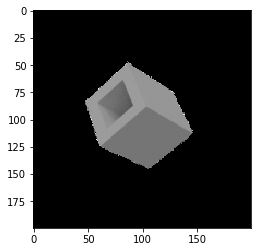

In [10]:
plt.imshow(images_train[10])

print('Label: ', labels_train[10])

Label:  3005 Brick 1x1


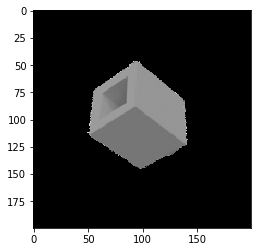

In [11]:
plt.imshow(images_train[11])

print('Label: ', labels_train[11])

Label:  3024 Plate 1x1


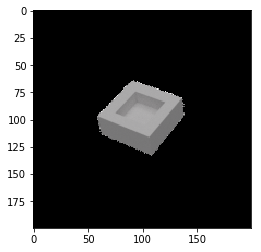

In [12]:
plt.imshow(images_train[1000])

print('Label: ', labels_train[1000])

Label:  3024 Plate 1x1


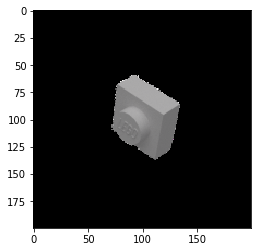

In [13]:
plt.imshow(images_train[1001])

print('Label: ', labels_train[1001])

In [14]:
X = images_train.reshape(images_train.shape[0], 
                         images_train.shape[1] * images_train.shape[2] * images_train.shape[3])

In [15]:
X.shape

(6379, 120000)

In [16]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Y = encoder.fit_transform(labels_train)

In [26]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)

x_train.shape, y_train.shape

((5103, 120000), (5103,))

In [20]:
x_test.shape, y_test.shape

((1276, 120000), (1276,))

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
clf_image = MLPClassifier(activation = 'relu',
                          hidden_layer_sizes = (100, 100, 100), 
                          solver='adam', 
                          verbose=True,
                          max_iter=100)

In [23]:
clf_image.fit(x_train, y_train)

Iteration 1, loss = 17.20213206
Iteration 2, loss = 7.33543649
Iteration 3, loss = 4.83172156
Iteration 4, loss = 2.97093581
Iteration 5, loss = 2.55987162
Iteration 6, loss = 2.40510029
Iteration 7, loss = 2.36411744
Iteration 8, loss = 1.62462687
Iteration 9, loss = 1.12415017
Iteration 10, loss = 0.99086458
Iteration 11, loss = 0.96767223
Iteration 12, loss = 1.58233988
Iteration 13, loss = 1.13016754
Iteration 14, loss = 0.98631583
Iteration 15, loss = 1.32583773
Iteration 16, loss = 1.15504213
Iteration 17, loss = 0.68989708
Iteration 18, loss = 0.75905733
Iteration 19, loss = 1.03999245
Iteration 20, loss = 0.81094971
Iteration 21, loss = 0.92302890
Iteration 22, loss = 0.97768651
Iteration 23, loss = 1.14133504
Iteration 24, loss = 1.61870541
Iteration 25, loss = 1.16575193
Iteration 26, loss = 0.87843148
Iteration 27, loss = 0.90112891
Iteration 28, loss = 0.75748039
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [24]:
y_pred = clf_image.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8753918495297806